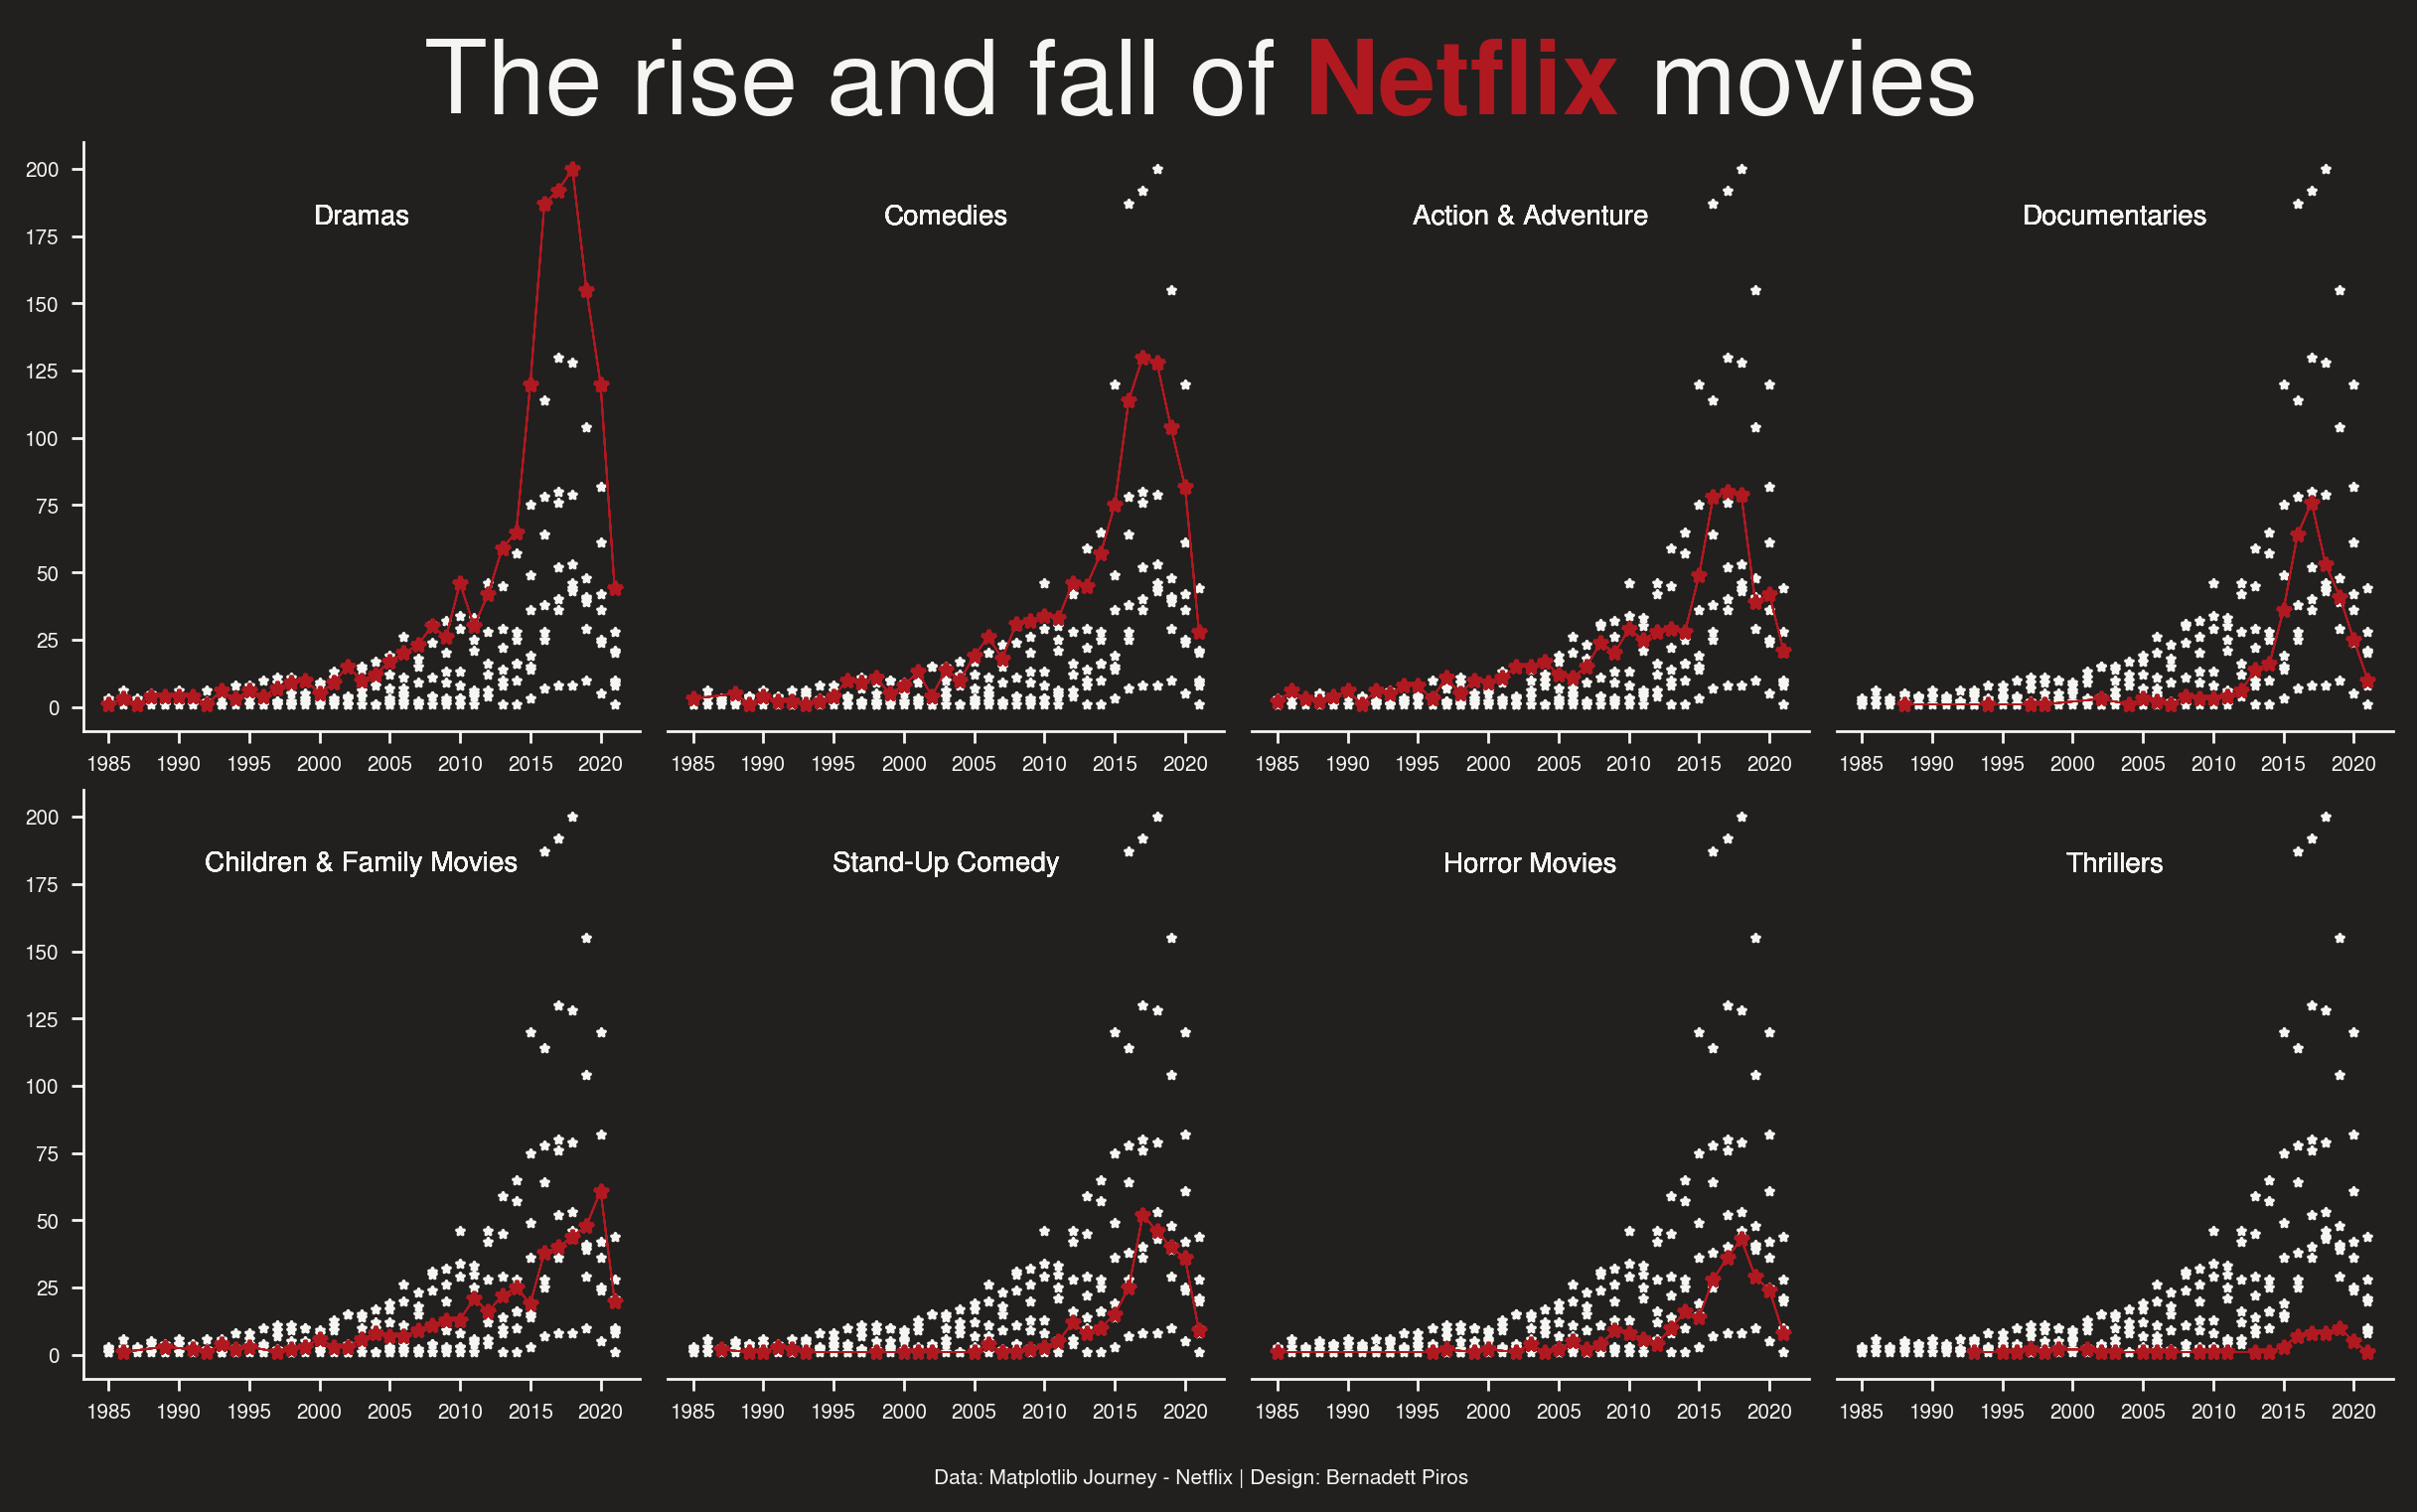

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from highlight_text import fig_text

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/netflix/netflix.csv"
df = pd.read_csv(url)

df["count"]=1
df["genre"] = df["listed_in"].str.split(",").str[0]

df = df[df["genre"].isin(["Action & Adventure", "Children & Family Movies", "Comedies", "Documentaries", "Dramas", "Horror Movies", "Stand-Up Comedy", "Thrillers"])]
df = df[df["release_year"]>=1985]

year_df = df.groupby(["release_year", "genre"])["count"].sum().reset_index()
count_df = df.groupby(["genre"]).agg(sum_count=("count", "sum")).reset_index()    
count_df = count_df.sort_values(by=["sum_count"], ascending=False, ignore_index=True)
df = year_df.merge(count_df, on="genre", how="left").sort_values(by=["count"], ascending=False)

plt.rcParams["font.family"] = "Nimbus Sans"

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,6), dpi=250)
plt.subplots_adjust(hspace=0.1, wspace=0.05, bottom=0.05)

genres = df["genre"].unique()

for i, (genre, ax) in enumerate(zip(genres, axs.flat)):   
   genre_df = year_df[year_df["genre"] == genre]
   other_df = year_df[year_df["genre"] != genre]
   for other_genre in other_df["genre"].unique():
      x_other = other_df.loc[other_df["genre"] == other_genre, "release_year"]
      y_other = other_df.loc[other_df["genre"] == other_genre, "count"]
      ax.scatter(x_other, y_other, marker="*", s=5, color="#f5f5f1")
       
      x = genre_df.loc[genre_df["genre"] == genre, "release_year"]
      y = genre_df.loc[genre_df["genre"] == genre, "count"]   
      ax.plot(x,y, marker="*", markersize=4, color="#b0191f", lw=0.5)

      ax.text(2003, 180, s=genre, color="#f5f5f1", ha="center", fontsize=8)
      ax.set_facecolor("#221f1f")

      ax.tick_params(labelcolor="#f5f5f1", labelsize=6, color="#f5f5f1")
      ax.spines[["top", "right"]].set_visible(False)
      ax.spines[["left", "bottom"]].set_color("#f5f5f1")

for ax in axs[0, 1], axs[0, 2], axs[0, 3], axs[1, 1], axs[1, 2], axs[1, 3]:
    ax.spines["left"].set_visible(False)
    ax.set_yticks([])


fig_text(
  x=0.5, y=0.95,
  s="The rise and fall of <Netflix> movies",
  color="#f5f5f1",
  size=30, ha="center",
  highlight_textprops=[
    {"color": "#b0191f", "weight":"bold"},    
  ],
)

fig.set_facecolor("#221f1f")

fig.text(0.5, -0.02, "Data: Matplotlib Journey - Netflix | Design: Bernadett Piros",
         size=6, ha="center", color="#f5f5f1")

plt.show()

#plt.savefig("connected_scatter_netflix", dpi=300, bbox_inches='tight', pad_inches=0.2)